# Assignment 1: Binary Decision Tree (10 marks)

Student Name: Wang Risheng

Student ID: 1053051

## General info

<b>Due date</b>: Friday, 11 August 2023 at 5 pm 

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: completed copy of this Jupyter notebook

<b>Late submissions</b>: -10% per day up to 5 days (both weekdays and weekends count)
<ul>
    <li>one day late, -1.0;</li>
    <li>two days late, -2.0;</li>
    <li>three days late, -3.0;</li>
    <li>four days late, -4.0;</li>
    <li>five days late, -5.0;</li>
</ul>

<b>Marks</b>: This assignment will be marked out of 10, and make up 10% of your overall mark for this subject.

<b>Materials</b>: See [Using Jupyter Notebook and Python page] on Canvas (under Modules> Coding Resources) for information on the basic setup required for this class, including a Jupyter notebook viewer and the python packages `numpy` and `pprint`. You can use any Python built-in packages, but do not use any other 3rd party packages; if your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  


<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should edit the sections below where requested, but leave the rest of the code as is. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions. 

You will be marked not only on the correctness of your methods and answers but also the quality and efficency of your code: in particular, you should be careful to use Python built-in functions and operators when appropriate and pick descriptive variable names that adhere to <a href="https://www.python.org/dev/peps/pep-0008/">Python style requirements</a>. If you think it might be unclear what you are doing, you should comment your code to help the marker make sense of it. We reserve the right to deduct up to 1 marks for unreadable or exessively inefficient code.

<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on Canvas>Assignments>Assignmnet1; we recommend you check it regularly.

<b>Academic misconduct</b>: This assignment is an individual task, and so reuse of code or other instances of clear influence will be considered cheating. Please check the <a href="https://canvas.lms.unimelb.edu.au/courses/153706/modules#module_662096">CIS Academic Honesty training</a> for more information. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.

**IMPORTANT**

Please carefully read and fill out the <b>Authorship Declaration</b> form at the bottom of the page. Failure to fill out this form results in the following deductions: 
<UL TYPE=”square”>
<LI>Missing Authorship Declaration at the bottom of the page, -1.0
<LI>Incomplete or unsigned Authorship Declaration at the bottom of the page, -0.5
</UL>

## Overview

In this assignment, you will build the binary Decision Tree (DT) classification algorithm from scratch and apply it to a real-world machine learning dataset. You are not allowed to use third party library functions and directly call pre-built DT algorithms. After building the DT, you will predict the predominant color of national flags using a diverse set of features, including country features such as language, population, in addition to other structural properties. The list of classes (colors) is:

```
black
blue
brown
gold
green
orange
red
white
```

We use a modified version of the Flags data set from the UCI Machine learning repository <a href="https://archive.ics.uci.edu/ml/datasets/Flags"> Flags Dataset</a> (click the link for more information on all features and values).


In the **Data Preparation** section, you will read the dataset into a data frame(Q1.1). You will also need to develop code to convert two of the numeric features to nominal (Q1.2). Then, the data will be divided into two parts: Train and Test. (Q1.3)

In the **Model Training** section, you will write a number of helper functions that will be incorporated into the main Binary Decision Tree function (Q2-6).

You can observe the use of each of these functions in the Main Binary Decision Tree Algorithm, which you can use to print your trained tree. We have also provided the code for navigating a trained tree and using it to predict the labels for the test dataset.

In the **Classification and Evaluation** section, you will test and evaluate your model. You will implement functions from scratch to calculate the accuracy of the model predictions (Q7). *For the evaluation part you are NOT allowed to use third party provided library functions such as classification_report.* Finally, you will train a tree and use it to predict the labels for the test set and see the accuracy of your model (Q8).

Q9 includes some analytical questions in which you will critically analyze the behaviour of your tree in different situations.


In [542]:
import numpy as np
import pandas as pd

from collections import Counter
from pprint import pprint

## Data Preparation 

The dataset that you have consist of a dataset with 194 flags. Each flag is defined by 26 features and 1 `label`. These features are `index`, `landmass`,	`zone`,	`area`,	..., `animate`,	and `text`.
The first feature is only an index and is not useful for classification, but the rest of the features can be used for predicting the color of the flag, i.e., `label`. 


#### Q1.1 Reading the input file and data preprocessing (0.25 marks)

This code should read the input file into a `pandas` dataframe. You should remove the first feature because it is only an id.

In [543]:
############ YOUR CODE HERE ##############
# First, read the input file
df = pd.read_csv("flags.data.csv")
# Second, drop the index column
df = df.drop(columns='index')

############## TEST IT YOURSELF ###############

assert df['landmass'][0] == 5
assert df['zone'][67] == 4


#### Q1.2 Convert Numeric features to Categorical (0.5 marks)
In order to simplify our calculations we are going to transform the `area` and `population` features with numeric values to categories. You will be using **equal frequency binning with 5 bins**.

**NOTE:** Assign sequential integer values starting from 0 to 4 to each of the bins. For example for `population` feature, any value between [0,1] is mapped to 0, any value between (1,4] is mapped to 1, and so on.


In [544]:
############ YOUR CODE HERE ##############
def equal_frequency_area(data):
    bin_size = 5
    df.sort_values('area')
    value = pd.qcut(df['area'], bin_size, labels = False, duplicates = 'drop')
    return value

def equal_frequency_population():
    bin_size = 5
    
    value = pd.qcut(df['population'], bin_size + 1, labels = False, duplicates = 'drop') 
    return value

## It shows that we cannot use qcut function directly to do equal frquency binning of 5 bins for values of population
## We may manually do the binning by using a stable sort algorithm
## Selection sort may be a good option since it is easy to use
## We not only swap the values but also the indices in the original array
## and we put indices in an array called indices
def insertion_sort_to_find_indices(array):
    indices = []

    for i in range(len(array)):
        indices.append(i)

    for i in range(len(array)):
        min_index = i
        for j in range(i+1, len(array)):
            if array[min_index] > array[j]:
                min_index = j
            array[i], array[min_index] = array[min_index], array[i]     
        ##print(min_index)
        indices[i], indices[min_index] = indices[min_index], indices[i]
    return indices

## Now we aim to separate the indices after swapping into 5 bins and each bin size has almost same size
array = df['population'].values
indices = insertion_sort_to_find_indices(array) 
bin_number = 5
each_bin_size = (len(array) // bin_number) + 1 ## Maximum size for each bin

indices_for_bin = [[] for _ in range(bin_number)] ## create an empty 2d array with 5 inner arrays
index = 0
run = True ## boolean value to indicate whether run
i = 0
while i in range(bin_number) and run:
    j = 0
    while j < each_bin_size:
        if index < len(indices):
            indices_for_bin[i].append(indices[index])
            index += 1
            j += 1
        else:
            run = False
            break;  
    i += 1

# Assign bin labels to the original data

## Assign bin labels to the original area data
df['area'] = equal_frequency_area(df['area'])
## Assign bin labels to the original population data
for i in range(len(indices_for_bin)):
    j = 0
    while j < len(indices_for_bin[i]):
        df.loc[indices_for_bin[i][j], 'population'] = i
        j += 1
    i += 1
##########################################

#### Q1.3 Split the data into a Train and Test Set (0.25 marks)
The first 150 instances should be used for training and the last 44 instances for testing. **SHUFFLING IS NOT ALLOWED!**

In [545]:
# the first 150 instances should be used for training and the last 44 instances for testing
# SHUFFLING IS NOT ALLOWED

train_df = df[:150]
test_df = df[150:]

############## TEST IT YOURSELF ###############
assert(len(train_df)==150)
assert(len(test_df)==44)

## Train a Binary Decision Tree

### Helper Functions

There are a number of helper functions that we provide here. In addition to the following helper functions, you must implement a few other helper functions to use in your binary decision tree algorithm. 

In [546]:
#######################################################################################
# This function receives instances in a 2D array format 
# and returns the most common label for the passed instances. 

def assign_label(data):
    # the input `data` is a 2D array
    # the output is a STRING 
    
    column = data[:, -1] 
    
    values, counts = np.unique(column, return_counts=True)
    index = counts.argmax()
    name = values[index]
    
    return name

#######################################################################################
# This function separates instances (data) based on a given feature (split feature)
# and a threshold value (value). 
# it returns a left and right subtree corresponding to that threshold value.

def find_subtrees(data, features_list, split_feature, value):  
    # the input `data` is a 2D array 
    # the input `features_list` is the list of feature names
    # the input `split_feature` specifies a single feature name
    # the input `value` specifies a value for the `split_feature`
    # the outputs `data_left` and `data_right` are 2D arrays (subtrees) 
    
    index = features_list.get_loc(split_feature)
    data_left = data[data[:,index]<value]
    data_right = data[data[:,index]>=value]
    
    return data_left, data_right

#######################################################################################
# This function computes the entropy of a set of instances (data) 

def calc_entopy(data):
    # the input `data` is a 2D array 
    # the output is a single real-valued number
    
    column = data[:, -1]
    _, counts = np.unique(column, return_counts=True)

    x = counts / counts.sum()  
    y = sum(x * -np.log2(x))
    
    return y



**Q2. Write a function that will determine whether a node is pure or not. (0.5 marks)**

It takes as input: 
- data: 2D array of values containing instances

It returns as output: 
- answer: a boolean value indicating whether the data (node) is pure or not

In [547]:
#This function receives a 2D array of values containing instances, it should have a format such as follows:
#  [[3, 1, 1, ..., 1, 0, 'red'],
#   [4, 1, 4, ..., 0, 0, 'green'],
#   [1, 1, 0, ..., 0, 0, 'red'],
#   ...,
#   [5, 1, 3, ..., 0, 0, 'red']]


def calc_purity(data): 
    # the input `data` is a 2D array as illustrated above
    # the output `answer` is a BOOLEAN (True or False)
    
    ############ YOUR CODE HERE ##############
    value = calc_entopy(data)
    if value != 0:
        answer = False
    else:
        answer = True
    
    ##########################################
    return answer

In [548]:
############## TEST IT YOURSELF ###############
assert calc_purity(df.values) == False

**Q3. Write a function that will determine the mean information for a given set of instances. (0.75 marks)**

It takes as input: 
- data: an array of 2D arrays of values containing instances

It returns as output: 
- mi: mean information which is a single real-valued number, refer to lecture 4 slides for Mean info

In [549]:
# This function receives an array of 2D arrays of values containing instances, it should have a format such as follows:
# [[[3, 1, 1, ..., 1, 0, 'red'],
#   [4, 1, 4, ..., 0, 0, 'green'],
#   [1, 1, 0, ..., 0, 0, 'red'],
#   ...,
#   [5, 1, 3, ..., 0, 0, 'red'],

#   [[6, 3, 0, ..., 1, 0, 'blue'],
#    [2, 3, 4, ..., 0, 0, 'gold'],
#    [2, 3, 4, ..., 0, 0, 'blue'],
#    ...,
#    [3, 3, 3, ..., 0, 0, 'blue']]]


def calculate_MI(data):
    # the input `data` is an array of 2D arrays as illustrated above
    # the output `mi` is a real-valued number
    ############ YOUR CODE HERE ##############
    total_array = 0
    for a in data:
        total_array = total_array + len(a)
    
    mi = 0
    for a in data:
        entropy = calc_entopy(a)
        prob = len(a)/total_array
        mi += entropy * prob
    
 
    ##########################################
    
    return mi


In [550]:
############## TEST IT YOURSELF ###############
assert(calculate_MI([df[df['label']=='red'].values,df[df['label']=='red'].values]) == 0)

**Q4. Write a function that will determine the information gain after we perform a split for a feature (0.5 marks)**

It takes as input: 
-  root: the data before the split
-  children: the subtrees after the split


It returns as output: 
- ig: Information Gain which is a single real-valued number, please refer to lecture 4 slides for information gain

In [551]:
def calculate_IG(root, children):
    # the input `root` is a 2D array as illustrated in Q2
    # the input `children` is an array of 2D arrays as illustared in Q3
    # the output `ig` is a real-valued number
    ############ YOUR CODE HERE ##############
    root_entropy = calc_entopy(root)
    children_MI = calculate_MI(children)
    ig = root_entropy - children_MI 
    
    ##########################################
    
    return ig


**Q5. Write a function that will determine the best feature and value combination that results in the highest information gain (0.75 marks)**

It takes as input: 
-  data: the data before the split
-  features_list: the list of feature names


It returns as output: 
- y1: name of the feature with the best information gain ( String ) 
- y2: value of the feature with the best information gain ( a feature value )

**Note: use the find_subtrees(data, feature_list, split_feature, value) function for all possible combinations of <feature,value> to determine the best <feature,value> combination resulting in the highest information gain** 

In [552]:
def find_best_IG(data,features_list):
    # the input `data` is a 2D array as illustrated in Q2
    # the input `feature_list` is a list of feature names in the format of pandas Index
    # the output `y1` is a String
    # the output y2 is a numeric feature value
    ############ YOUR CODE HERE ##############
    max = 0
    
    for a in features_list[0:-1]:
        values = df[a]
        for i in values:
            left, right = find_subtrees(data, features_list, a, i)
            if calculate_IG(data,[left, right]) > max:
                max = calculate_IG(data,[left, right])
                y1 = a
                y2 = i
    
    
    ##########################################
    
    return y1, y2


            

In [553]:
############## TEST IT YOURSELF ###############
assert(find_best_IG(train_df.values,train_df.columns)==('blue',1))

### Main Binary Decision Tree Algorithm
**Q6. This is the recursive part of developing the Binary Decision Tree. If you have developed all the previous parts correctly this function will make a Binary Decision Tree for the passed dataset. We can set the maximum depth of the tree (`max_depth`) and number of samples that we would stop splitting a node (`min_samples`). You must edit the code below in the marked area `criteria` for the stopping condition in the ID3 algorithm. (0.5 marks)**

The criteria are:
 - the current node is pure or;
 - number of instances in the current node is less than minimum samples or;
 - we have reached the maximum depth of the tree

In [554]:
def decision_tree_algorithm(data, array, max_depth, counter=0, min_samples=2):
    
    
    criteria = calc_purity(data) == True or len(array) < min_samples ############  YOUR CODE HERE  ##############  
    if criteria :
        y = assign_label(data)
        return y
    
    # recursive part
    else:
        counter += 1
        
        name, value = find_best_IG(data,array)
        data1, data2 = find_subtrees(data, array, name, value)
        
        if (len(data1) == 0) or (len(data2) == 0):
            y = assign_label(data)
            return y
    
        #instansiate the tree
        node = "{} < {}".format(name, value)
        sub_tree = {node: []}
              
        #develop the sub-trees (recursion)
        left_child = decision_tree_algorithm(data=data1, array=array, max_depth=max_depth, counter=counter)
        right_child = decision_tree_algorithm(data=data2, array=array, max_depth=max_depth, counter=counter)
        
        
        if left_child == right_child:
            sub_tree = right_child
        else:
            sub_tree[node].append(left_child)
            sub_tree[node].append(right_child)
        
        return sub_tree   
         

In [555]:
############## TEST IT YOURSELF ###############
data = train_df
tree = decision_tree_algorithm(data=data.values, array=data.columns, max_depth=2, counter=0)
print(tree)

{'blue < 1': [{'red < 1': [{'orange < 1': [{'population < 2': ['white', 'green']}, {'landmass < 5': [{'landmass < 4': ['white', 'orange']}, 'brown']}]}, {'gold < 1': [{'area < 3': [{'circles < 4': [{'white < 1': [{'zone < 2': ['green', {'landmass < 3': ['black', 'red']}]}, {'triangle < 1': [{'colours < 4': ['red', {'area < 2': [{'stripes < 3': ['red', 'green']}, 'red']}]}, 'black']}]}, 'orange']}, {'area < 4': [{'language < 8': ['white', {'green < 1': ['white', 'red']}]}, {'circles < 1': [{'colours < 3': ['red', {'landmass < 5': ['green', 'red']}]}, 'white']}]}]}, {'green < 1': [{'area < 3': [{'zone < 3': [{'population < 2': [{'sunstars < 1': ['gold', 'red']}, 'red']}, 'white']}, {'area < 4': ['black', {'stripes < 3': ['red', 'black']}]}]}, {'zone < 2': [{'language < 6': ['gold', 'green']}, {'area < 3': [{'area < 2': [{'zone < 3': ['red', 'gold']}, 'green']}, {'bars < 2': [{'stripes < 5': ['red', 'gold']}, 'gold']}]}]}]}]}]}, {'red < 1': [{'green < 1': [{'stripes < 3': [{'stripes < 1':

# Classification and Evaluation

Now that we have built our binary decision tree, we are ready to use it to predict a label for unseen instances. We provided the code to do this, below.

In [556]:
def predict_one_instance(example, tree):
    
    # tree is just a root node
    if not isinstance(tree, dict):
        return tree
    
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split(" ")

    # ask question
    if (example[feature_name] < float(value)):
        answer = tree[question][0]
    else:
        answer = tree[question][1]

    # base case (the answer in not a dictionary)
    if not isinstance(answer, dict):
        return answer
    
    # recursive part
    else:
        residual_tree = answer
        return predict_one_instance(example, residual_tree)


In [557]:
def make_predictions(df, tree):
    
    if len(df) != 0:
        predictions = df.apply(predict_one_instance, args=(tree,), axis=1)
    else:
        # "df.apply()"" with empty dataframe returns an empty dataframe,
        # but "predictions" should be a series instead
        predictions = pd.Series()  
    return predictions

**Q7. Write a function to calculate accuracy (0.25 marks)**

This function receives a dataframe and predictions of a trained tree (on that dataset) and should calculate the accuracy of the predictions for the passed dataframe.

**NOTE:** You are NOT allowed to use any predefined Python accuracy methods here. 

In [558]:
def calculate_accuracy(df, predictions):
    
    ########### YOUR CODE HERE ##############
    failure = 0
    for true_value, prediction in zip(df['label'], predictions):
        if true_value != prediction:
            failure += 1
    accuracy = 1 - failure / len(predictions)
    return accuracy

**Q8. Use the Tree (0.25 marks)**

Using all the developed functions above build a tree using the **Training set** (train_df) (max_depth = 3) and then use it to predict labels for the **Test set** (test_df). Then print the accuracy of your tree for the test set.

In [559]:
#############  YOUR CODE HERE ##############
max_depth = 3
tree =  decision_tree_algorithm(train_df.values, train_df.columns, max_depth, counter=0)
prediction = make_predictions(test_df, tree)
accuracy = calculate_accuracy(test_df, prediction)
print(accuracy)
###########################################

0.43181818181818177


## Q9. Analytical questions (5.5 marks)

Answer each of the following subquestions with a text answer of 3-5 sentences, using the results you obtained in the previous sections. You might need to re-run and reuse some of the functions you already implemented in the ### CODE ### cells above.


### Q9.1. Analysing equal-frequency versus equal-width binning (1.5 marks)

**(A)** Write a code to transform the `area` and `population` features with numeric values to categories using **equal width** binning with 5 bins. **[0.5 mark]**

**(B)** Name which approach is more appropriate for `area` and `population` features, and explain the reasoning behind your decision.
**[1 mark]**







In [560]:
### CODE 9.1(A) ###
## First we find the maximum value and minimum value for area and population respectively
def max_min(df, label):

    max = df[label].values.max()
    min = df[label].values.min()

    return max,min

area_max, area_min = max_min(df, 'area')
population_max, population_min = max_min(df, 'population')

## Now we use linspace to find the boundaries
bin_size = 5
area_boundaries = np.linspace(area_min, area_max, bin_size + 1)
population_boundaries = np.linspace(population_min, population_max, bin_size + 1)

area_weight = pd.cut(df['area'], area_boundaries, labels=range(1, bin_size + 1), include_lowest=True)
population_weight = pd.cut(df['population'], population_boundaries, labels=range(1, bin_size + 1), include_lowest=True)

**Type your text answers here**

**(B)**

Equal width binnning with 5 bins is a better approach for population and area.  
The maximum value of area shown in the csv file is 22402 but majority of values are below 1000. If we choose equal frequency binning with 5 bins, the range of values in 1 bin is very large while that in another bin is small. In this case, it is hard to find the actual boundary.
Similar for population. 

### Q9.2. Analysing model accuracy (2.25 marks)

**(A)** Plot a <a href="https://en.wikipedia.org/wiki/Histogram">histogram</a> of the actual class frequencies in the test set, and a histogram of the predicted test labels for the decision tree with depth=3. You should produce **a single plot** which shows the histogram both true and predicted labels. You should label the x-axis and y-axis appropriately and use legends to make your plot readable. [*N.B. you may use libraries like <a href="https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py">matplotlib</a> or <a href="https://seaborn.pydata.org/introduction.html">seaborne</a>*] **[1 mark]**

**(B)** Describe and explain the discrepancy between the true and predicted distributions. **[0.75 mark]**

**(C)** Do you think the accuracy is an appropriate evaluation metric for the *Flags* data set? Explain your answer. **[0.5 marks]**


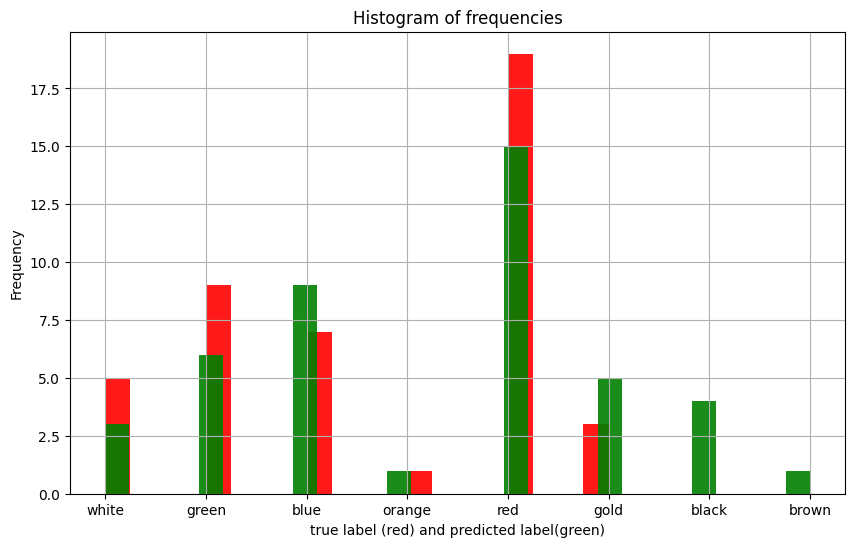

In [561]:
import matplotlib.pyplot as plt

################################################
# Your answer to Question 9.2(A) STARTS HERE
################################################
# Example true test labels and predicted test labels (replace with your actual data)
label1 = 'true' 
label2 = 'predicted'  
data_label1 = test_df['label']
data_label2 = prediction
plt.figure(figsize=(10, 6))
plt.hist(data_label1, bins=20, alpha=0.9, color='red', label=label1)
plt.hist(data_label2, bins=30, alpha=0.9, color='green', label=label2)
plt.xlabel('true label (red) and predicted label(green)')
plt.ylabel('Frequency')
plt.title('Histogram of frequencies')
plt.grid(True)
plt.show()

################################################
# Your answer to Question 9.2(A) ENDS HERE
################################################


**Type your text answers here**

**(B)**
In the test data set, there is no such a flag which is labeled as black or brown.  However, there are flags labeled as black and brown in the predictions. But generally, the accuracy rate of frequencies for each colour apart from black and brown is above 50%. 
The reason that the predictions have labeled some flags as black and brown is that the prediction uses the tree based on train data set and train data set has labelled some instances as brown or black.   
**(C)**  
Accuracy is a correct evaluation metric for the Flags data set. The program uses the tree generated by train data set to predict the label for each flag and includes all labels of flags, which means that all colours are used, in the train data set.

### Q9.3 Features (0.75 mark)

By looking at the `flags.names` file as well as your helper functions answer the following question. Feel free to implement gain ratio but you can answer this question intuitively too. 

**(A)** If we were to use `gain ratio` instead of `information gain`, which of the 25 attributes would be most affected? why? **0.75**



In [562]:
### CODE 9.3 optional code ###
def calculate_GR(root, children, child):
    answer = 0
    if calc_entopy(child) != 0:
        answer = calculate_IG(root, children)/calc_entopy(child)
    return answer

def find_best_GR(data, features_list):
    max = 0
    
    for a in features_list[0:-1]:
        values = df[a]
        for i in values:
            left, right = find_subtrees(data, features_list, a, i)
            if calculate_GR(data,[left, right], left) > max:
                max = calculate_GR(data,[left, right], left)
                y1 = a
                y2 = i
            elif calculate_GR(data,[left, right], right) > max:
                max = calculate_GR(data,[left, right], right)
                y1 = a
                y2 = i
    return y1,y2

feature, value = find_best_GR(train_df.values,train_df.columns)
print(feature, value)

blue 1


**Type your text answers here**    
(blue, 1) is still the most affected attribute based on the result of the program



### Q9.4 Decision tree complexity (1 mark)

**(A)** Using the tree you generated in Q8 (name it `little_tree`), find the accuracy of the tree for predicting the labels for the **training set**. Do you notice a difference between train and test accuracy? If so, discuss possible reasons. 

**(B)** Now change the max_depth of the decision tree to 10 and train another tree (name it `big_tree`). Now use this new tree to predict the labels for test and train sets. Describe and explain any change in the results you notice compared to your tree of depth 3.


In [563]:
### CODE 9.4 (A) ###
max_depth = 3
little_tree =  decision_tree_algorithm(train_df.values, train_df.columns, max_depth, counter=0)
prediction = make_predictions(train_df, little_tree)
accuracy = calculate_accuracy(train_df, prediction)
print(accuracy)

1.0


In [564]:
### CODE 9.4 (B) ###
max_depth = 10
big_tree = decision_tree_algorithm(train_df.values, train_df.columns, max_depth, counter=0)
prediction_train = make_predictions(train_df, big_tree)
accuracy_train = calculate_accuracy(train_df, prediction_train)
prediction_test = make_predictions(test_df, big_tree)
accuracy_test = calculate_accuracy(test_df, prediction_test)
print(accuracy_train)
print(accuracy_test)

1.0
0.43181818181818177


**Type your text answers here**

**(A)**  
The predictions based on the tree generated by train data set gives the 100% accuracy for the train data set since it uses the tree based on train data set, therefore there is no doubt that It will predict all corret.      
**(B)**    
The results show that max depth does not affect the accuracy. 
No matter how many depths this tree has, the nodes are generated based on the attributes of the train data set.
The prediction mainly uses features to predict the labels. So the depth of the tree is not matter

# Authorship Declaration:

   (1) I certify that the program contained in this submission is completely
   my own individual work, except where explicitly noted by comments that
   provide details otherwise.  I understand that work that has been developed
   by another student, or by me in collaboration with other students,
   or by non-students as a result of request, solicitation, or payment,
   may not be submitted for assessment in this subject.  I understand that
   submitting for assessment work developed by or in collaboration with
   other students or non-students constitutes Academic Misconduct, and
   may be penalized by mark deductions, or by other penalties determined
   via the University of Melbourne Academic Honesty Policy, as described
   at https://academicintegrity.unimelb.edu.au.

   (2) I also certify that I have not provided a copy of this work in either
   softcopy or hardcopy or any other form to any other student, and nor will
   I do so until after the marks are released. I understand that providing
   my work to other students, regardless of my intention or any undertakings
   made to me by that other student, is also Academic Misconduct.

   (3) I further understand that providing a copy of the assignment
   specification to any form of code authoring or assignment tutoring
   service, or drawing the attention of others to such services and code
   that may have been made available via such a service, may be regarded
   as Student General Misconduct (interfering with the teaching activities
   of the University and/or inciting others to commit Academic Misconduct).
   I understand that an allegation of Student General Misconduct may arise
   regardless of whether or not I personally make use of such solutions
   or sought benefit from such actions.

   <b>Signed by</b>: [Wang Risheng 1053051]
   
   <b>Dated</b>: [07/08/2023]